Los autoencoders son una herramienta muy poderosa que está pensada para hacer representaciones eficientes de los datos, la máquina va a aprender a representar los datos de manera eficiente.

Un autoencoder básicamente lo que hace es intentar aprender una función que comprime los datos que recibe reduciéndolos a una representación codificada de dimensión mucho menor y luego los reconstruye a su forma original o a una aproximación cercana.

Para poder usar los autoencoders tenemos que descargar la librería de Tensorflow, ya que no viene con Anaconda.

In [1]:
!pip install tensorflow

   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   - -------------------------------------- 8.4/332.0 MB 42.3 MB/s eta 0:00:08
   -- ------------------------------------- 17.0/332.0 MB 42.7 MB/s eta 0:00:08
   --- ------------------------------------ 26.0/332.0 MB 43.0 MB/s eta 0:00:08
   ---- ----------------------------------- 33.6/332.0 MB 40.8 MB/s eta 0:00:08
   ---- ----------------------------------- 40.6/332.0 MB 39.8 MB/s eta 0:00:08
   ----- ---------------------------------- 44.8/332.0 MB 36.8 MB/s eta 0:00:08
   ------ --------------------------------- 50.6/332.0 MB 35.6 MB/s eta 0:00:08
   ------ --------------------------------- 55.1/332.0 MB 34.0 MB/s eta 0:00:09
   ------- -------------------------------- 59.8/332.0 MB 32.3 MB/s eta 0:00:09
   ------- -------------------------------- 64.5/332.0 MB 31.2 MB/s eta 0:00:09
   -------- ------------------------------- 69.5/332.0 MB 30.4 MB/s eta 0:00:09
   --------- ------------------------------ 75.0/3

In [2]:
import tensorflow as tf
print(tf.__version__)

2.20.0


In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

In [3]:
digitos = load_digits()
digitos

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [4]:
digitos['data'][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [5]:
digitos['data'][0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

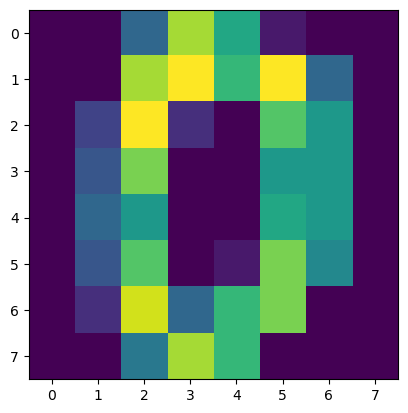

In [6]:
plt.imshow(digitos['data'][0].reshape(8, 8));

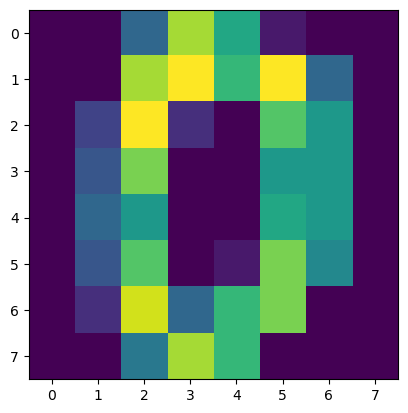

In [7]:
plt.imshow(digitos['images'][0]);

In [8]:
X = digitos['data']

In [9]:
# normalizar valores
X = X / 16.0 # se divide entre 16 porque los numeros de digitos tipicamente
             # tienen valores en el rango de 0 - 16, asi que dividiendo sus valores
             # entre 16.0 nos aseguramos que el resultado este entre 0 y 1

In [10]:
X_entrena, X_prueba = train_test_split(X, test_size=0.2, random_state=42)

In [11]:
imagen_entrada = Input(shape=(64, )) # es la forma especifica que el modelo va a esperar que tengamos nuestros datos
                                     # o sea que el arreglo de 8x8 va a pasar de forma aplanada siendo un arreglo de una diemension

Después tenemos que hacer la codificación y su decodificación, para eso usaremos la función **dense** que se refiere a una capa densa que tendrá muchísimos puntos de información y que todos esos puntos van a estar conectados entre sí como una red de neuronas donde cada neurona tiene una conexión directa con cada una de las demás neuronas.

A la función 'dense' se le tiene que definir el **número de neuronas** que tiene la capa densa, la cantidad de neuronas dependerá de muchos factores, de objetos específicos del modelo o del conjunto de datos con el que estés trabajando.

Esta decisión sobre el número de neuronas puede influir en la **capacidad del modelo para aprender patrones complejos de los datos**, SI tienes un **número grande de neuronas** puede aumentar la capacidad del modelo para aprender detalles finos de los datos de entrenamiento (que sería beneficioso si tu conjunto de datos es muy complejo o muy variado), pero también puede pasar que el modelo aprenda tanto que aprende incluso lo que se le llama **ruido** en los datos de entrenamiento, en lugar de relaciones importantes generales y esto puedes perjudicar su rendimiento en datos nuevos y, por otro lado, si eliges un **número pequeño de neuronas** el modelo podría no tener tanta capacidad para aprender adecuadamente esos patrones de los datos, lo que como resultado crear un modelo demasiado simple que es incapaz de capturar la estructura subyacente de los datos.

In [26]:
codificado = Dense(32, activation='relu')(imagen_entrada)

32 es el número de neuronas y en este caso es un punto de inicio ilustrativo, ya que no es un estándar, solo se seleccionó porque es la mitad de los 64 píxeles que tiene la imagen. El argumento `activation` que está como "relu" se refiere **rectified linear unit** que es una de las funciones de activación más comunes en las redes neuronales por su simplicidad y su eficacia. Después por separado tenemos `imagen_entrada` que básicamente es el path para decirle a 'dense' que a la capa densa que hemos definido debe aplicarse a las entradas que proporcionaremos por imagen entrada.

En términos simples, una capa densa es un grupo de neuronas trabajando juntas donde cada una contribuye un poco basada en su propio peso para transformar un nuevo mensaje que es la salida de la capa que combina todos sus puntos de vista.

In [27]:
decodificado = Dense(64, activation='sigmoid')(codificado)

Para decodificar los datos de salida de la capa densa tenemos que darle la cantidad de entradas original **64**, `activation` lo marcamos como "sigmoid" que es una función que convierte los valores de entrada a la capa en valores entre 0 y 1, lo cual es muy útil, ya que los valores de entrada originales también estaban entre 0 y 1, por último le decimos que la capa dense se aplica a la salida de la capa de codificación.

In [28]:
autoencoder = Model(imagen_entrada, decodificado) # preparacion del modelo

In [29]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

El optimizador es un algoritmo que ajusta los pesos del modelo, `adam` es uno de los optimizadores más populares y más efectivos porque ajusta la tasa de aprendizaje automáticamente y funciona en la mayoría de los casos sin más configuración.

La función de perdida mide que tan bien el modelo está haciendo su trabajo, es este caso es reconstruir la imagen original a partir de la versión comprimida, `binary_crossentropy` es una elección muy común cuando los datos de entrada son binarios, porque esta función de perdida compara cada pixel de la imagen de entrada con cada pixel de la imagen reconstruida.

In [30]:
autoencoder.fit(X_entrena, X_entrena, epochs=100, batch_size=256, shuffle=True, validation_data=(X_prueba, X_prueba))

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.6992 - val_loss: 0.6842
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6761 - val_loss: 0.6629
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6551 - val_loss: 0.6419
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6335 - val_loss: 0.6192
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6096 - val_loss: 0.5937
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5833 - val_loss: 0.5659
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.5551 - val_loss: 0.5373
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5270 - val_loss: 0.5097
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5004 - val_loss: 0.4850
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4771 - val_loss: 0.4641
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4575 - val_loss: 0.4472
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4418 - val_lo

Entrenamos el modelo con el mismo conjunto de datos para las entradas como para las salidas esperadas, ya que el objetivo es reconstruir las entradas originales a partir de las representaciones comprimidas, el siguiente argumento que es `epoch` es el número de veces que va a repasar todo el conjunto de datos de entrenamiento, luego sigue `batch_size` o lotes, durante el entrenamiento los datos se dividen en pequeños paquetes o lotes que se procesan de forma independiente, en este caso **batch size** de 256 indica que el modelo debería tomar 256 ejemplos de `X_entrena` a la vez, entrenarlos, actualizar su peso y luego pasar el siguiente lote de 256 ejemplos más, después sigue `shuffle` esto hace que los datos se mezclen antes de cada **epoch**, esto ayuda a prevenir que el modelo aprenda el orden de los datos en lugar de las características subyacentes, y por último `validation_data` es el conjunto de datos para probar que el modelo está aprendiendo correctamente.

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


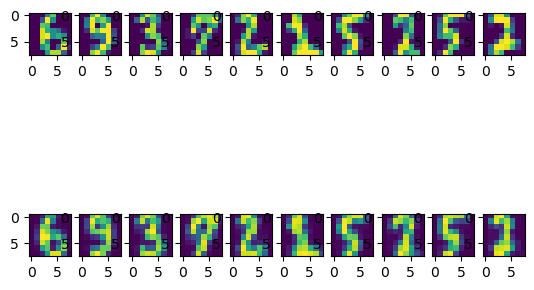

In [31]:
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_prueba[i].reshape(8, 8))
    plt.subplot(2, 10, i+1+10)
    plt.imshow(autoencoder.predict(X_prueba)[i].reshape(8, 8))